In [16]:
#TITANIC : https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('../Miniproject/data/titanic.csv')

data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<AxesSubplot:xlabel='Survived', ylabel='count'>

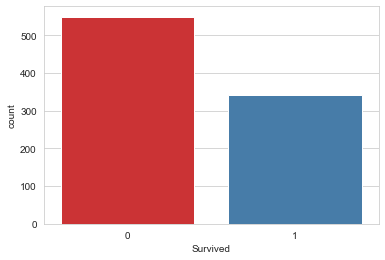

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data, palette='Set1')

<AxesSubplot:xlabel='Survived', ylabel='count'>

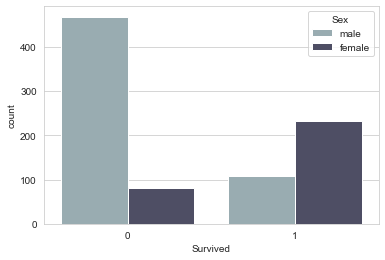

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data, palette='bone_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

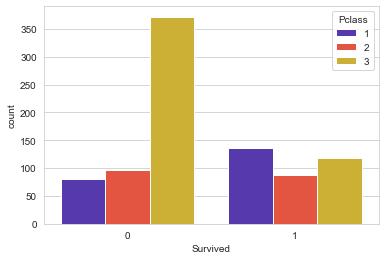

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=data,palette='CMRmap')

#DATA CLEANING

In [20]:
#The average age for each passenger class is used to fill missing data under the age column
#This is done to avoid losing data rows because of the few missing fields

data.groupby(['Pclass'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [21]:
#Based on the output(mean) of the line above the following method is made
# to insert values into empty slots in the age column:

def fillEmptyData_age(input):
    Age = input[0]
    Pclass = input[1]

    for i in range(len(Age)):
        if pd.isnull(Age[i]):
            if Pclass[i] == 1:
               Age[i] = 37

            elif Pclass[i] == 2:
                Age[i] = 29

            else:
                Age[i] = 24
    return Age

print(len(data['Age']))
print(data['Age'].unique())

data['Age'] = fillEmptyData_age([data['Age'],data['Pclass']])

print(data['Age'].unique())
print(len(data['Age']))

891
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
[22.   38.   26.   35.   24.   54.    2.   27.   14.    4.   58.   20.
 39.   55.   29.   31.   34.   15.   28.    8.   19.   40.   37.   66.
 42.   21.   18.    3.    7.   49.   65.   28.5   5.   11.   45.   17.
 32.   16.   25.    0.83 30.   33.   23.   46.   59.   71.   47.   14.5
 70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.   56.
 50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.   60.
 10.   64.   13.   48.    0.75 53.   57.

In [22]:
data.drop('Cabin',axis=1,inplace=True)
data.dropna(inplace=True) #Remove rows with missing data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)

data.drop(['Sex','Embarked','Name','Ticket', 'PassengerId', 'Fare'],axis=1,inplace=True)

data = pd.concat([data,sex,embark],axis=1)

X = data.drop(['Survived'],axis=1)
Y = data['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

print(x_train)
print(y_train)

     Pclass   Age  SibSp  Parch  male  Q  S
77        3  24.0      0      0     1  0  1
744       3  31.0      0      0     1  0  1
474       3  22.0      0      0     0  0  1
212       3  22.0      0      0     1  0  1
719       3  33.0      0      0     1  0  1
..      ...   ...    ...    ...   ... .. ..
107       3  24.0      0      0     1  0  1
271       3  25.0      0      0     1  0  1
862       1  48.0      0      0     0  0  1
436       3  21.0      2      2     0  0  1
103       3  33.0      0      0     1  0  1

[800 rows x 7 columns]
77     0
744    1
474    0
212    0
719    0
      ..
107    1
271    1
862    1
436    0
103    0
Name: Survived, Length: 800, dtype: int64


# Logistic Regression

              precision    recall  f1-score   support

           0       0.91      0.84      0.88        58
           1       0.74      0.84      0.79        31

    accuracy                           0.84        89
   macro avg       0.83      0.84      0.83        89
weighted avg       0.85      0.84      0.84        89

0.8426966292134831
C:\Users\HE400\anaconda3\envs\sos\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


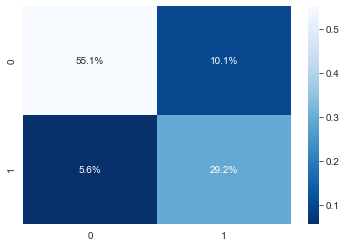

In [24]:
model_log = LogisticRegression()
model_log.fit(x_train,y_train)

pred_log = model_log.predict(x_test)
x_test.head()
cm = confusion_matrix(y_test,pred_log)

sns.heatmap(cm/np.sum(cm), annot=True, cmap='Blues_r', fmt='.1%')

print(classification_report(y_test,pred_log))
print(accuracy_score(y_test,pred_log))

# Decision Tree Classifiction

gini -->
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        58
           1       0.72      0.68      0.70        31

    accuracy                           0.80        89
   macro avg       0.78      0.77      0.77        89
weighted avg       0.80      0.80      0.80        89

0.797752808988764

******************************************************************************

entropy -->
              precision    recall  f1-score   support

           0       0.85      0.90      0.87        58
           1       0.79      0.71      0.75        31

    accuracy                           0.83        89
   macro avg       0.82      0.80      0.81        89
weighted avg       0.83      0.83      0.83        89

0.8314606741573034

******************************************************************************



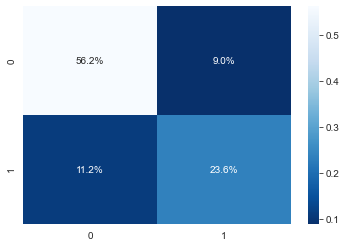

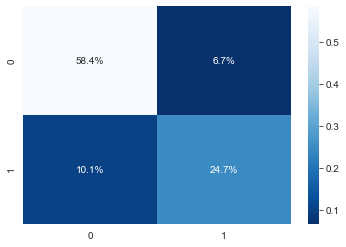

<Figure size 432x288 with 0 Axes>

In [25]:
DTC_LIST = ['gini','entropy']

for c in DTC_LIST:
    model_dt = DecisionTreeClassifier(criterion=c)
    model_dt.fit(x_train,y_train)
    pred_dt = model_dt.predict(x_test)
    cm = confusion_matrix(y_test,pred_dt)
    sns.heatmap(cm/np.sum(cm), annot=True, cmap='Blues_r', fmt='.1%')
    plt.figure()
    print(c, '-->')
    print(classification_report(y_test,pred_dt))
    print(accuracy_score(y_test, pred_dt))
    print('')
    print('******************************************************************************')
    print('')

#Random Forest Classifier

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        58
           1       0.74      0.74      0.74        31

    accuracy                           0.82        89
   macro avg       0.80      0.80      0.80        89
weighted avg       0.82      0.82      0.82        89

0.8202247191011236
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        58
           1       0.74      0.74      0.74        31

    accuracy                           0.82        89
   macro avg       0.80      0.80      0.80        89
weighted avg       0.82      0.82      0.82        89

0.8202247191011236
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        58
           1       0.74      0.74      0.74        31

    accuracy                           0.82        89
   macro avg       0.80      0.80      0.80        89
weighted avg       0.82      0.82   

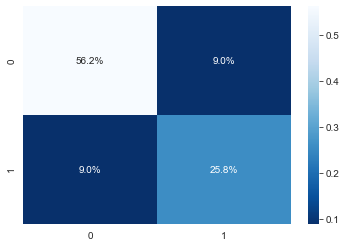

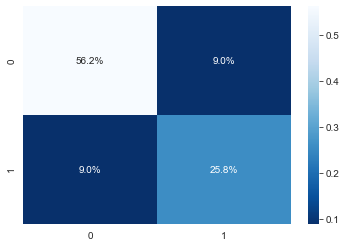

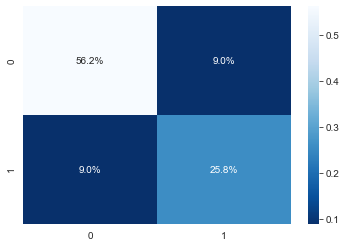

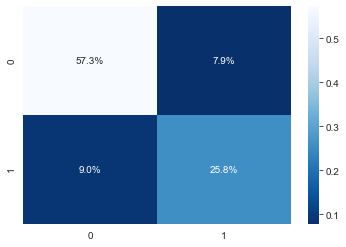

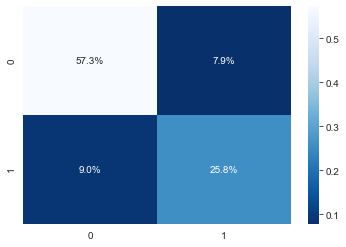

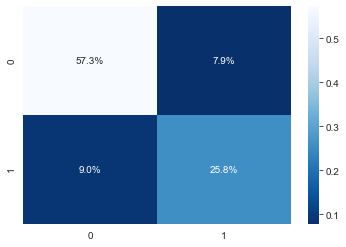

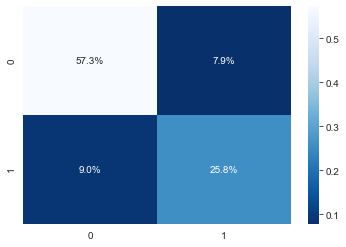

<Figure size 432x288 with 0 Axes>

In [26]:
for estimator in [100,200,500,1000,5000,10000,15000]:
    model_RForest= RandomForestClassifier(n_estimators=estimator, random_state = 1)
    model_RForest.fit(x_train,y_train)

    pred_RForest = model_RForest.predict(x_test)

    cm = confusion_matrix(y_test,pred_RForest)
    sns.heatmap(cm/np.sum(cm), annot=True, cmap='Blues_r', fmt='.1%')
    plt.figure()

    print(classification_report(y_test,pred_RForest))
    print(accuracy_score(y_test,pred_RForest))


#K-Neighbor-Near Classification


n_neighbors= 1
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        58
           1       0.65      0.55      0.60        31

    accuracy                           0.74        89
   macro avg       0.72      0.70      0.70        89
weighted avg       0.73      0.74      0.74        89

0.7415730337078652

n_neighbors= 2
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        58
           1       0.75      0.48      0.59        31

    accuracy                           0.76        89
   macro avg       0.76      0.70      0.71        89
weighted avg       0.76      0.76      0.75        89

0.7640449438202247

n_neighbors= 3
              precision    recall  f1-score   support

           0       0.82      0.72      0.77        58
           1       0.58      0.71      0.64        31

    accuracy                           0.72        89
   macro avg       0.70      0.72      0.7

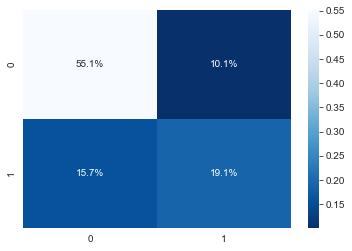

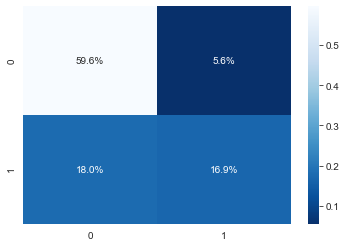

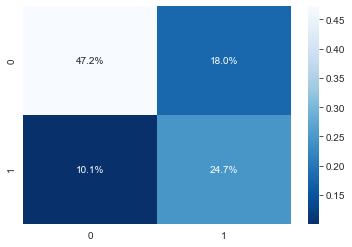

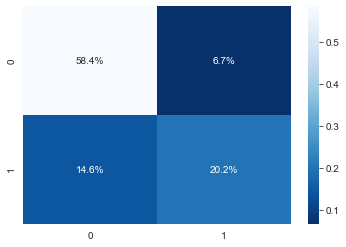

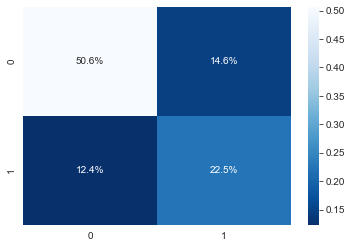

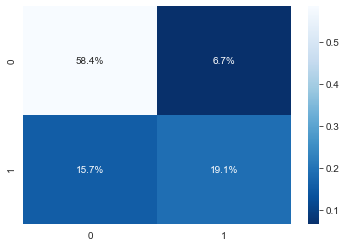

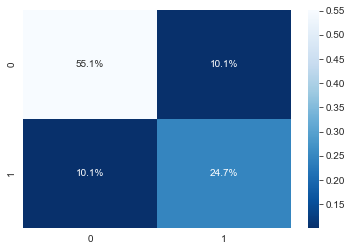

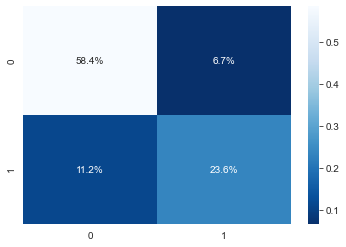

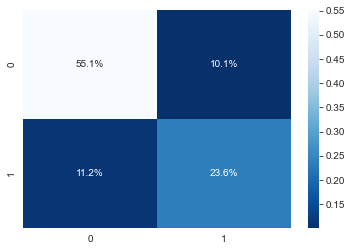

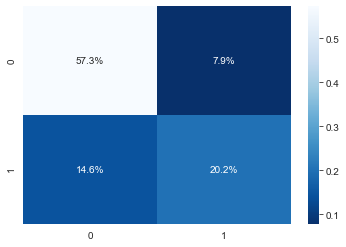

<Figure size 432x288 with 0 Axes>

In [27]:


for k in range(10):
    knn = KNeighborsClassifier(n_neighbors=k+1)
    knn.fit(x_train,y_train)

    Y_pred = knn.predict(x_test)

    cm = confusion_matrix(y_test,Y_pred)
    sns.heatmap(cm/np.sum(cm), annot=True, cmap='Blues_r', fmt='.1%')
    plt.figure()
    print('')
    print('n_neighbors=', k+1)
    print(classification_report(y_test, Y_pred))
    print(accuracy_score(y_test, Y_pred))   


#Support-Vector Machine Classification 


              precision    recall  f1-score   support

           0       0.89      0.84      0.87        58
           1       0.74      0.81      0.77        31

    accuracy                           0.83        89
   macro avg       0.81      0.83      0.82        89
weighted avg       0.84      0.83      0.83        89

Accuracy with linear kernel:
0.8314606741573034

**********************************************************

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        58
           1       1.00      0.06      0.12        31

    accuracy                           0.67        89
   macro avg       0.83      0.53      0.46        89
weighted avg       0.78      0.67      0.56        89

Accuracy with poly kernel:
0.6741573033707865

**********************************************************

              precision    recall  f1-score   support

           0       0.66      0.97      0.78        58
           1       0.

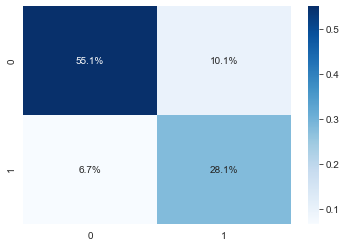

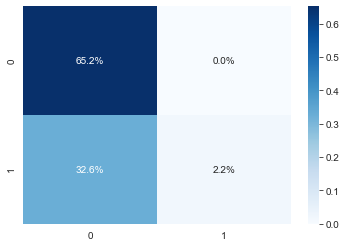

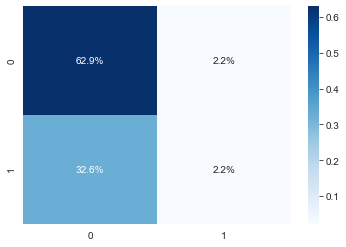

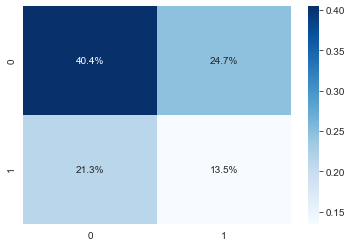

<Figure size 432x288 with 0 Axes>

In [28]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel_name in kernels:
    model_SVC = SVC(kernel=kernel_name)
    model_SVC.fit(x_train, y_train)

    y_pred_svc = model_SVC.predict(x_test)

    cm = confusion_matrix(y_test,y_pred_svc)

    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.1%', cmap='Blues')
    plt.figure()
    print(classification_report(y_test, y_pred_svc))
    print('Accuracy with',kernel_name, 'kernel:')
    print(accuracy_score(y_test, y_pred_svc))
    print('')
    print('**********************************************************')
    print('')

In [29]:

# model1 = LogisticRegression(solver='liblinear', random_state=0, max_iter = 1000).fit(x_train,y_train)